In [5]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

In [6]:
carScenarioData = np.loadtxt ('CarScenarioData.csv',
                skiprows = 1, delimiter = ",")

# years
years = carScenarioData[:,0]

# all data from year 2011 so have to pad with 0's to move to start from 2000

# base data to subtract from rcp8.5 scenario
baseData = np.pad(carScenarioData[:,1], (11,0), 'constant') 

# Electric Car Only Scenarios
EV2100Data = np.pad(carScenarioData[:,2], (11,0), 'constant') 
EV2050Data = np.pad(carScenarioData[:,3], (11,0), 'constant') 

# Electric Car and Automation Scenarios
# number before Auto denotes fuel efficiency 
EV77Auto2100Data = np.pad(carScenarioData[:,4], (11,0), 'constant') 
EV50Auto2100Data = np.pad(carScenarioData[:,5], (11,0), 'constant') 
EV77Auto2050Data = np.pad(carScenarioData[:,6], (11,0), 'constant') 
EV50Auto2050Data = np.pad(carScenarioData[:,7], (11,0), 'constant') 

# Electric Car, Automation, and Shared Scenarios
# number before Auto denotes fuel efficiency 
EV77AutoShared2100Data = np.pad(carScenarioData[:,8], (11,0), 'constant') 
EV50AutoShared2100Data = np.pad(carScenarioData[:,9], (11,0), 'constant') 
EV77AutoShared2050Data = np.pad(carScenarioData[:,10], (11,0), 'constant') 
EV50AutoShared2050Data = np.pad(carScenarioData[:,11], (11,0), 'constant') 



<div class="alert alert-info"><h1>Electric Car Only Scenarios</h1></div>

In [4]:
rcp85 = OSCAR(scen_ALL='RCP8.5').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


In [14]:
EV2050 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV2050Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV2100 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV2100Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)


LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


Text(0.5,1,'Carbon-Equivalent Emissions Deviation from RCP 8.5')

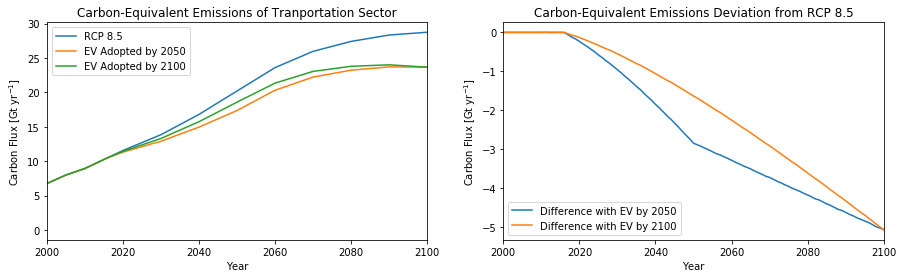

In [11]:
year = np.arange(len(rcp85['D_gst'])) + 1700
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)

ax1.plot(year, rcp85['EFF']['Total'], label = 'RCP 8.5')
ax1.plot(year, EV2050['EFF']['Total'], label = 'EV Adopted by 2050')
ax1.plot(year, EV2100['EFF']['Total'], label = 'EV Adopted by 2100')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')
ax1.set_xlim([2000, 2100])
ax1.set_title('Carbon-Equivalent Emissions of Tranportation Sector')

ax2.plot(year, EV2050['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV by 2050')
ax2.plot(year, EV2100['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV by 2100')
ax2.legend(loc='lower left')
ax2.set_xlim([2000, 2100])
ax2.set_xlabel('Year')
ax2.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')
ax2.set_title('Carbon-Equivalent Emissions Deviation from RCP 8.5')

Text(0.5,1,'Global Surface Temperature Deviation from RCP 8.5 Projection')

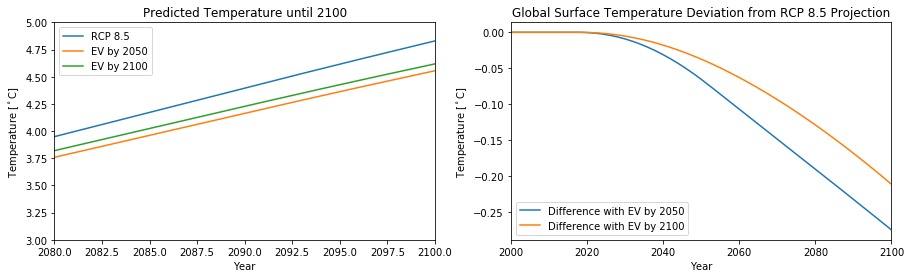

In [18]:
year = np.arange(len(rcp85['D_gst'])) + 1700
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)

ax1.plot(year, rcp85['D_gst'], label = 'RCP 8.5')
ax1.plot(year, EV2050['D_gst'], label = 'EV by 2050')
ax1.plot(year, EV2100['D_gst'], label = 'EV by 2100')
ax1.legend()
ax1.set_xlim([2080, 2100])
ax1.set_ylim([3, 5])
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature [$^\circ$C]')
ax1.set_title('Predicted Temperature until 2100')

ax2.plot(year, EV2050['D_gst'] - rcp85['D_gst'], label = 'Difference with EV by 2050')
ax2.plot(year, EV2100['D_gst'] - rcp85['D_gst'], label = 'Difference with EV by 2100')
ax2.legend(loc='lower left')
ax2.set_xlim([2000, 2100])
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature [$^\circ$C]')
ax2.set_title('Global Surface Temperature Deviation from RCP 8.5 Projection')


<div class="alert alert-info"><h1>Electric Car + Automation Scenarios</h1></div>

In [7]:
EV77Auto2100 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV77Auto2100Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV50Auto2100 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV50Auto2100Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV77Auto2050 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV77Auto2050Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV50Auto2050 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV50Auto2050Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


Text(0.5,1,'Carbon-Equivalent Emissions Deviation from RCP 8.5')

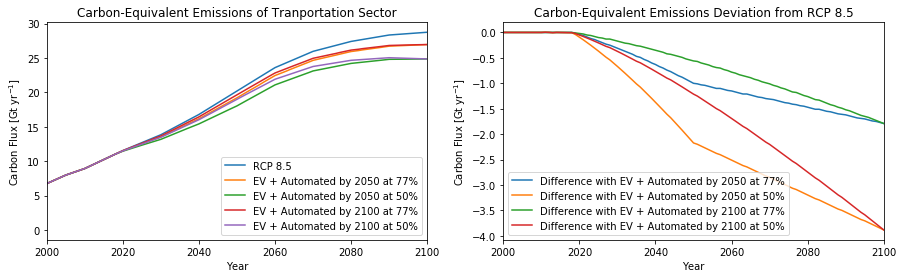

In [8]:
year = np.arange(len(rcp85['D_gst'])) + 1700
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)

ax1.plot(year, rcp85['EFF']['Total'], label = 'RCP 8.5')
ax1.plot(year, EV77Auto2050['EFF']['Total'], label = 'EV + Automated by 2050 at 77%')
ax1.plot(year, EV50Auto2050['EFF']['Total'], label = 'EV + Automated by 2050 at 50%')
ax1.plot(year, EV77Auto2100['EFF']['Total'], label = 'EV + Automated by 2100 at 77%')
ax1.plot(year, EV50Auto2100['EFF']['Total'], label = 'EV + Automated by 2100 at 50%')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')
ax1.set_xlim([2000, 2100])
ax1.set_title('Carbon-Equivalent Emissions of Tranportation Sector')

ax2.plot(year, EV77Auto2050['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2050 at 77%')
ax2.plot(year, EV50Auto2050['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2050 at 50%')
ax2.plot(year, EV77Auto2100['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2100 at 77%')
ax2.plot(year, EV50Auto2100['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2100 at 50%')
ax2.legend(loc='lower left')
ax2.set_xlim([2000, 2100])
ax2.set_xlabel('Year')
ax2.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')
ax2.set_title('Carbon-Equivalent Emissions Deviation from RCP 8.5')


Text(0.5,1,'Global Surface Temperature Deviation from RCP 8.5 Projection')

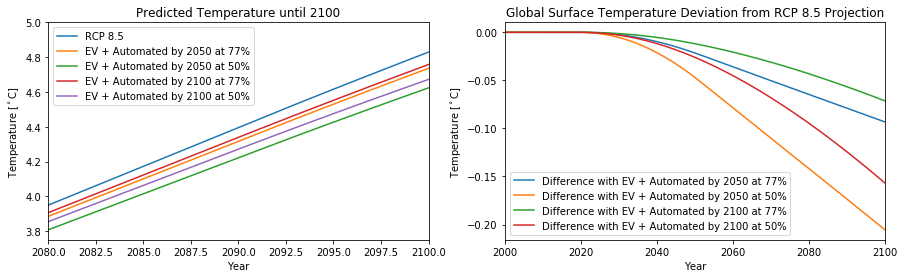

In [13]:
year = np.arange(len(rcp85['D_gst'])) + 1700
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)

ax1.plot(year, rcp85['D_gst'], label = 'RCP 8.5')
ax1.plot(year, EV77Auto2050['D_gst'], label = 'EV + Automated by 2050 at 77%')
ax1.plot(year, EV50Auto2050['D_gst'], label = 'EV + Automated by 2050 at 50%')
ax1.plot(year, EV77Auto2100['D_gst'], label = 'EV + Automated by 2100 at 77%')
ax1.plot(year, EV50Auto2100['D_gst'], label = 'EV + Automated by 2100 at 50%')
ax1.legend()
ax1.set_xlim([2080, 2100])
ax1.set_ylim([3.75, 5])
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature [$^\circ$C]')
ax1.set_title('Predicted Temperature until 2100')

ax2.plot(year, EV77Auto2050['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2050 at 77%')
ax2.plot(year, EV50Auto2050['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2050 at 50%')
ax2.plot(year, EV77Auto2100['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2100 at 77%')
ax2.plot(year, EV50Auto2100['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2100 at 50%')
ax2.legend()
ax2.set_xlim([2000, 2100])
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature [$^\circ$C]')
ax2.set_title('Global Surface Temperature Deviation from RCP 8.5 Projection')

<div class="alert alert-info"><h1>Electric Car + Automation + Shared Scenarios</h1></div>

In [15]:
EV77AutoShared2100 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV77AutoShared2100Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV50AutoShared2100 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV50AutoShared2100Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV77AutoShared2050 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV77AutoShared2050Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

EV50AutoShared2050 = OSCAR(scen_ECH4='RCP8.5', scen_EFF= rcp85['EFF']['Total'][300:] - baseData + EV50AutoShared2050Data, 
                 scen_EN2O='RCP8.5', scen_ESO2='RCP8.5',
              scen_ENH3='RCP8.5', scen_EOC='RCP8.5',
                  scen_EBC='RCP8.5', scen_ENOX='RCP8.5', 
                  scen_ECO='RCP8.5', scen_EVOC='RCP8.5',
               scen_Ehalo='RCP8.5', scen_RFant='RCP8.5',
              scen_RFnat='RCP8.5', scen_LULCC='RCP8.5',
                  scen_HARV='RCP8.5', scen_SHIFT='RCP8.5',
                 mod_DATAscen='prescribed').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


Text(0.5,1,'Carbon-Equivalent Emissions Deviation from RCP 8.5')

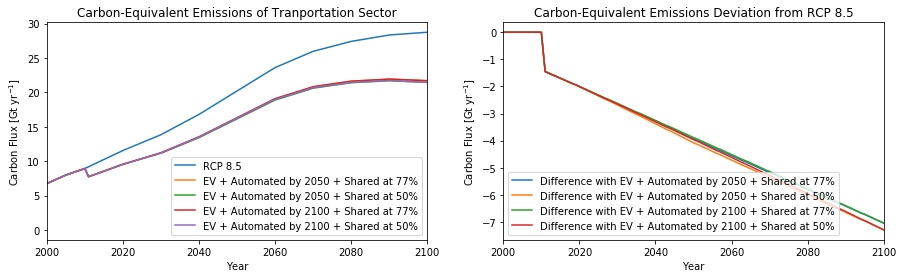

In [22]:
year = np.arange(len(rcp85['D_gst'])) + 1700
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)

ax1.plot(year, rcp85['EFF']['Total'], label = 'RCP 8.5')
ax1.plot(year, EV77AutoShared2050['EFF']['Total'], label = 'EV + Automated by 2050 + Shared at 77%')
ax1.plot(year, EV50AutoShared2050['EFF']['Total'], label = 'EV + Automated by 2050 + Shared at 50%')
ax1.plot(year, EV77AutoShared2100['EFF']['Total'], label = 'EV + Automated by 2100 + Shared at 77%')
ax1.plot(year, EV50AutoShared2100['EFF']['Total'], label = 'EV + Automated by 2100 + Shared at 50%')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')
ax1.set_xlim([2000, 2100])
# ax1.set_ylim([20, 30])
ax1.set_title('Carbon-Equivalent Emissions of Tranportation Sector')

ax2.plot(year, EV77AutoShared2050['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2050 + Shared at 77%')
ax2.plot(year, EV50AutoShared2050['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2050 + Shared at 50%')
ax2.plot(year, EV77AutoShared2100['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2100 + Shared at 77%')
ax2.plot(year, EV50AutoShared2100['EFF']['Total']-rcp85['EFF']['Total'], label = 'Difference with EV + Automated by 2100 + Shared at 50%')
ax2.legend(loc='lower left')
ax2.set_xlim([2000, 2100])
ax2.set_xlabel('Year')
ax2.set_ylabel('Carbon Flux [Gt yr$^{-1}$]')
ax2.set_title('Carbon-Equivalent Emissions Deviation from RCP 8.5')


Text(0.5,1,'Global Surface Temperature Deviation from RCP 8.5 Projection')

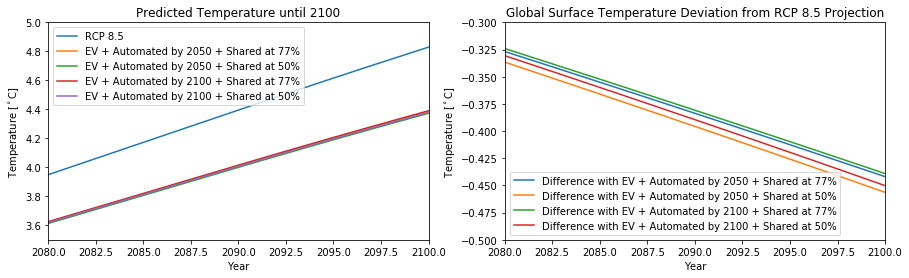

In [27]:
year = np.arange(len(rcp85['D_gst'])) + 1700
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 4)

ax1.plot(year, rcp85['D_gst'], label = 'RCP 8.5')
ax1.plot(year, EV77AutoShared2050['D_gst'], label = 'EV + Automated by 2050 + Shared at 77%')
ax1.plot(year, EV50AutoShared2050['D_gst'], label = 'EV + Automated by 2050 + Shared at 50%')
ax1.plot(year, EV77AutoShared2100['D_gst'], label = 'EV + Automated by 2100 + Shared at 77%')
ax1.plot(year, EV50AutoShared2100['D_gst'], label = 'EV + Automated by 2100 + Shared at 50%')
ax1.legend()
ax1.set_xlim([2080, 2100])
ax1.set_ylim([3.5, 5])
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature [$^\circ$C]')
ax1.set_title('Predicted Temperature until 2100')

ax2.plot(year, EV77AutoShared2050['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2050 + Shared at 77%')
ax2.plot(year, EV50AutoShared2050['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2050 + Shared at 50%')
ax2.plot(year, EV77AutoShared2100['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2100 + Shared at 77%')
ax2.plot(year, EV50AutoShared2100['D_gst'] - rcp85['D_gst'], label = 'Difference with EV + Automated by 2100 + Shared at 50%')
ax2.legend()
ax2.set_xlim([2080, 2100])
ax2.set_ylim([-.5, -.3])
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature [$^\circ$C]')
ax2.set_title('Global Surface Temperature Deviation from RCP 8.5 Projection')